In [24]:
#Import the libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import pandas_ta as ta
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [5]:
# Download the data
end_date='2023-09-27'
start_date=pd.to_datetime(end_date)-pd.DateOffset(365*4)
data=yf.download('SPY',start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [10]:
%%capture
print(data.index)
data.reset_index(inplace=True)
data.set_index('Date',inplace=True)
print(data.head())

In [14]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [27]:

data['rsi'] = ta.rsi(close=data['Adj Close'], length=14)
data


,Open,High,Low,Close,Adj Close,Volume,rsi
Date,,,,,,,
2019-09-30,295.970001,297.549988,295.920013,296.769989,275.560730,51662400,NaN
2019-10-01,297.739990,298.459991,293.000000,293.239990,272.282990,88242400,NaN
2019-10-02,291.500000,291.510010,286.640015,288.059998,267.473267,122539500,NaN
2019-10-03,287.809998,290.450012,284.820007,290.420013,269.664490,85278800,NaN
2019-10-04,291.140015,294.630005,291.079987,294.350006,273.313690,65091200,NaN
...,...,...,...,...,...,...,...
2023-09-20,444.010010,444.440002,438.429993,438.640015,434.115112,82562600,41.783869
2023-09-21,435.700012,435.970001,431.230011,431.390015,426.939911,103976100,34.050428
2023-09-22,432.450012,434.100006,429.989990,430.420013,425.979889,100829700,33.165948


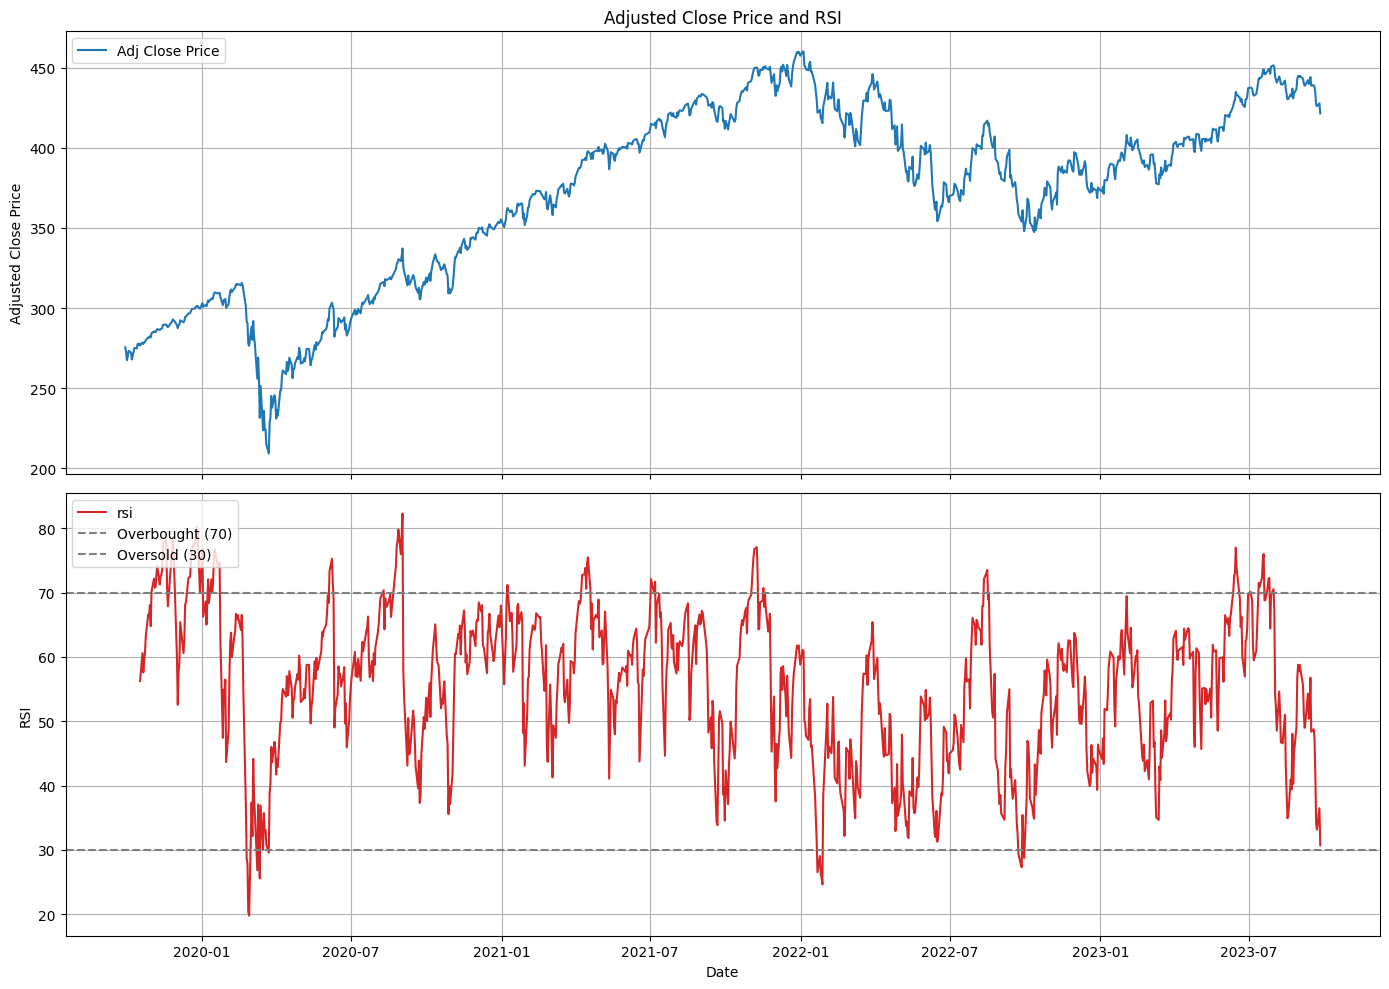

In [28]:
# Plot RSI and Adjusted Close Price in separate subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Plot Adjusted Close Price
ax1.plot(data.index, data['Adj Close'], color='tab:blue', label='Adj Close Price')
ax1.set_ylabel('Adjusted Close Price')
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.set_title('Adjusted Close Price and RSI')

# Plot RSI
ax2.plot(data.index, data['rsi'], color='tab:red', label='rsi')
ax2.axhline(70, color='gray', linestyle='--', label='Overbought (70)')
ax2.axhline(30, color='gray', linestyle='--', label='Oversold (30)')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')
ax2.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [32]:
data['Buy Signal']=(data['rsi']<30)
data['Sell Signal']=(data['rsi']>70)

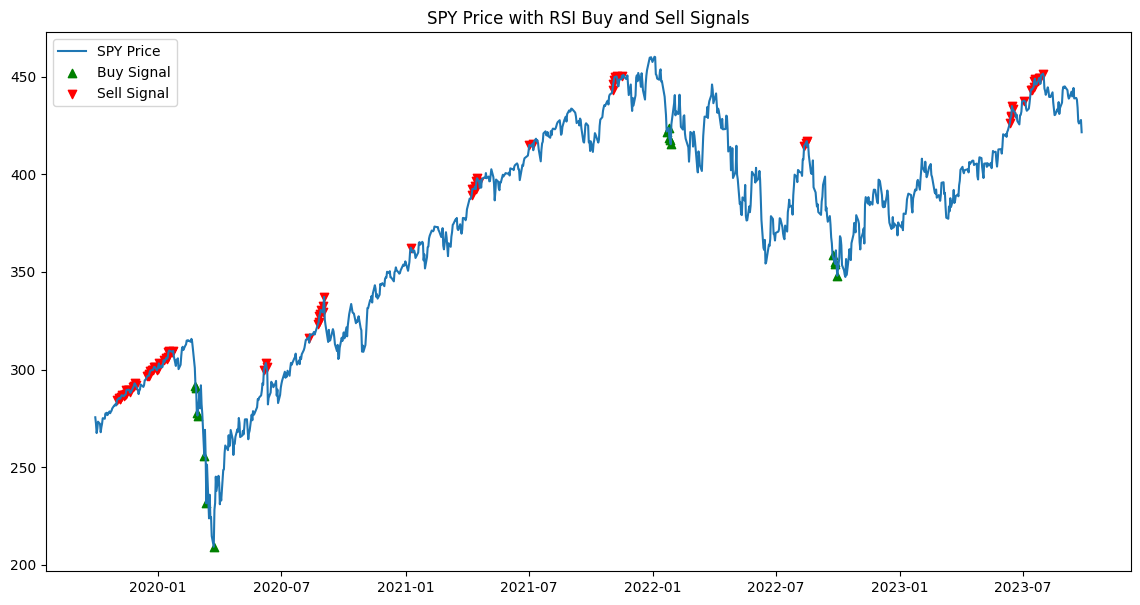

In [37]:
plt.figure(figsize=(14,7))
plt.plot(data['Adj Close'],label='SPY Price')
plt.scatter(data.index[data['Buy Signal']],data['Adj Close'][data['Buy Signal']],marker='^',color='g',label='Buy Signal',alpha=1)
plt.scatter(data.index[data['Sell Signal']],data['Adj Close'][data['Sell Signal']],marker='v',color='r',label='Sell Signal',alpha=1)
plt.title('SPY Price with RSI Buy and Sell Signals')
plt.legend()
plt.show()